![](https://assets.fta.cirium.com/wp-content/uploads/2021/12/03211704/ASir-image-3.jpg)

# Problem Statement
Our company has been providing high-quality air transportation service to our clients for several years, ensuring a safe, comfortable, and convenient journey for our passengers. We operate a diverse fleet of aircraft, ranging from small business jets to medium-sized machines. However, we currently face challenges due to various factors such as stricter environmental regulations, higher flight taxes, increased interest rates, rising fuel prices, and a tight labor market leading to higher labor costs. These challenges are putting pressure on the company's profitability, and we are actively seeking solutions to address this issue. In order to tackle this challenge, the company is planning to **analyze their database** and **identify opportunities to increase the occupancy rate, thereby boosting the average profit earned per seat.**

# Main Business Challenges
1. **Stricter environmental regulations**: The airlines industry is facing increasing pressure to reduce its carbon footprint, leading to the implementation of more stringent environmental laws. These regulations not only raise operating costs but also restrict the potential for expansion.

2. **Higher flight taxes**: Governments worldwide are imposing heavier taxes on aircraft as a means to address environmental concerns and generate revenue. This increase in flight taxes has raised the overall cost of flying, subsequently reducing demand.

3. **Tight labor market resulting in increased labor costs**: The aviation sector is experiencing a scarcity of skilled workers, leading to higher labor costs and an increase in turnover rates.

# Objectives

1. **Increase the Occupancy Rate**: By increasing the occupancy rate, we can boost average profit earned per seat and mitigate the impact of the challenges we are facing.
2. **Improve Pricing Strategy**: Develop a comprehensive pricing strategy that takes into account market changes and customer preferences in order to attract and retain customers.
3. **Enhance Customer Experience**: Focus on providing seamless customer experience from booking to boarding.

The main goal of this study is to identify opportunities to increase occupancy rate in order to boost the average profit earned per seat.

## Importing Libraries

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Connecting to the database

In [ ]:
connect = sqlite3.connect('/content/travel.sqlite')
cursor = connect.cursor()

## List of all the tables

In [ ]:
cursor.execute("SELECT * FROM sqlite_master WHERE type='table'")

tables = cursor.fetchall()
df = pd.DataFrame(tables, columns=[desc[0] for desc in cursor.description])
df

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


#Data Exploration

In [ ]:
flight = pd.read_sql_query("SELECT * FROM flights", connect)
flight

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [ ]:
aircraft_data = pd.read_sql_query("SELECT * FROM aircrafts_data", connect)
aircraft_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [ ]:
airport_data = pd.read_sql_query("SELECT * FROM airports_data", connect)
airport_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [ ]:
boarding_pass = pd.read_sql_query("SELECT * FROM boarding_passes", connect)
boarding_pass

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [ ]:
booking = pd.read_sql_query("SELECT * FROM bookings", connect)
booking

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [ ]:
seats = pd.read_sql_query("SELECT * FROM seats", connect)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


<BarContainer object of 9 artists>

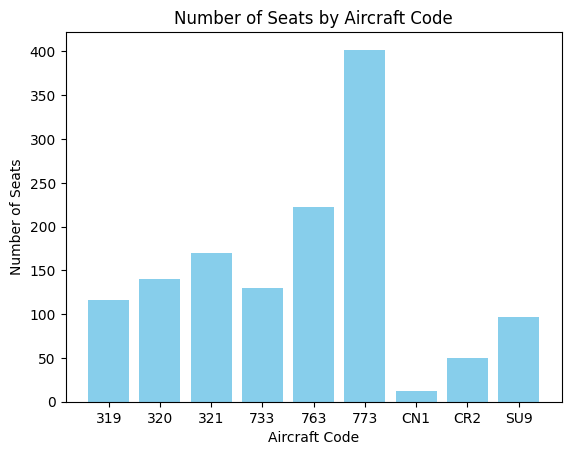

In [ ]:
Seats_count = seats.groupby('aircraft_code')['aircraft_code'].count()
Seats_count
plt.xlabel('Aircraft Code')
plt.ylabel('Number of Seats')
plt.title('Number of Seats by Aircraft Code')
plt.bar(Seats_count.index, Seats_count.values, color='skyblue')

In [ ]:
ticket_flight = pd.read_sql_query("SELECT * FROM ticket_flights", connect)
ticket_flight

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [ ]:
ticket = pd.read_sql_query("SELECT * FROM tickets", connect)
ticket

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


# Basic Analysis
The basic analysis of the data provides insights into the number of planes with more than 100 seats, how the number of tickets booked and total amount earned changed over time, and the average fare for each aircraft with different fare conditions. These findings will be useful in developing strategies to increase occupancy rates and optimize pricing for each aircraft.

### How many planes have more than 100 seats?

In [ ]:
x=pd.read_sql_query("""SELECT aircraft_code, COUNT(*) AS num_seats FROM seats
                        group by aircraft_code having num_seats > 100;""", connect)
x

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


<BarContainer object of 9 artists>

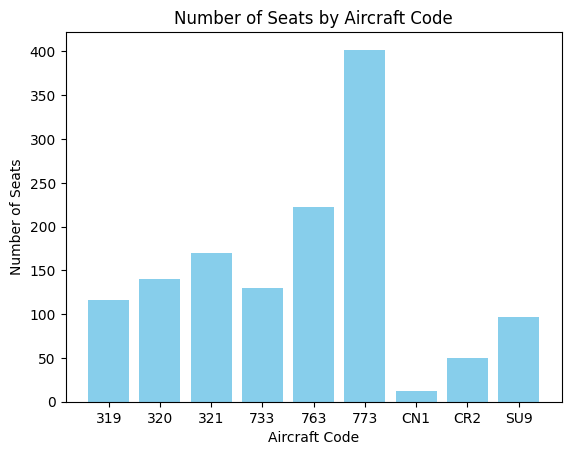

In [ ]:
Seats_count = seats.groupby('aircraft_code')['aircraft_code'].count()
Seats_count
plt.xlabel('Aircraft Code')
plt.ylabel('Number of Seats')
plt.title('Number of Seats by Aircraft Code')
plt.bar(Seats_count.index, Seats_count.values, color='skyblue')

### How the number of tickets booked and total amount earned changed over time?

In [ ]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref;""", connect)
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03,210600
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03,210600
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03,45900
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03,219400


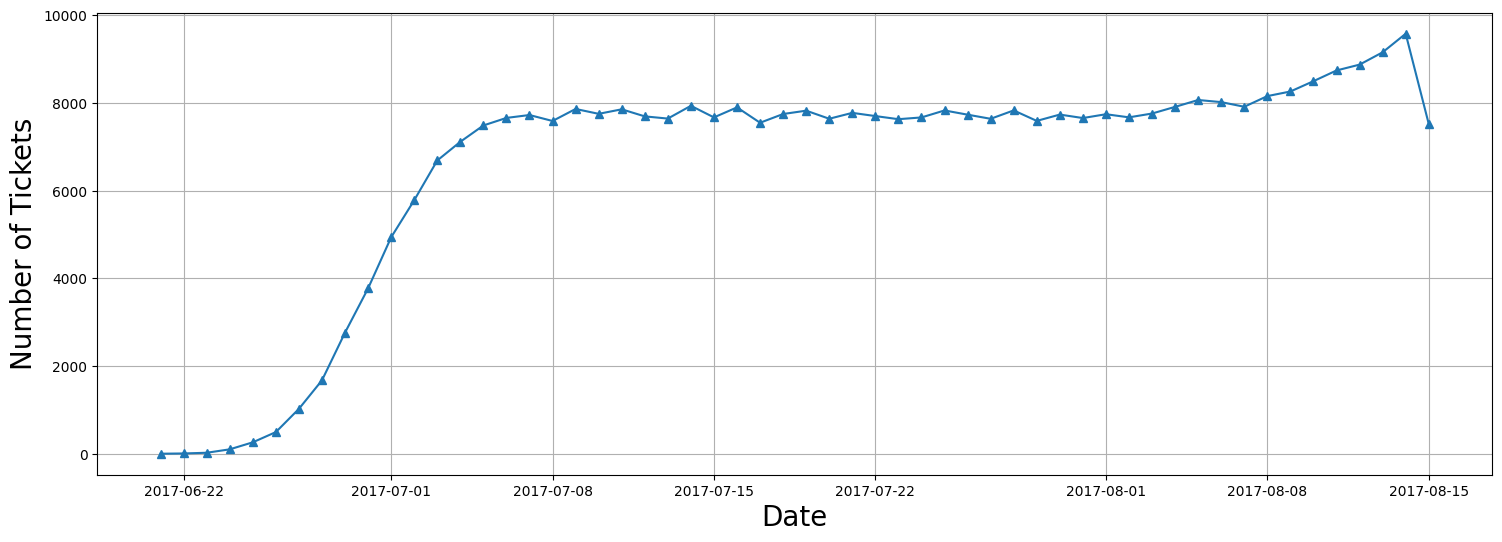

In [ ]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref;""", connect)

tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
x = tickets.groupby('date')[['date']].count()
plt.figure(figsize = (18, 6))
plt.plot(x.index, x['date'], marker = '^')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of Tickets', fontsize = 20)
plt.grid('b')
plt.show()

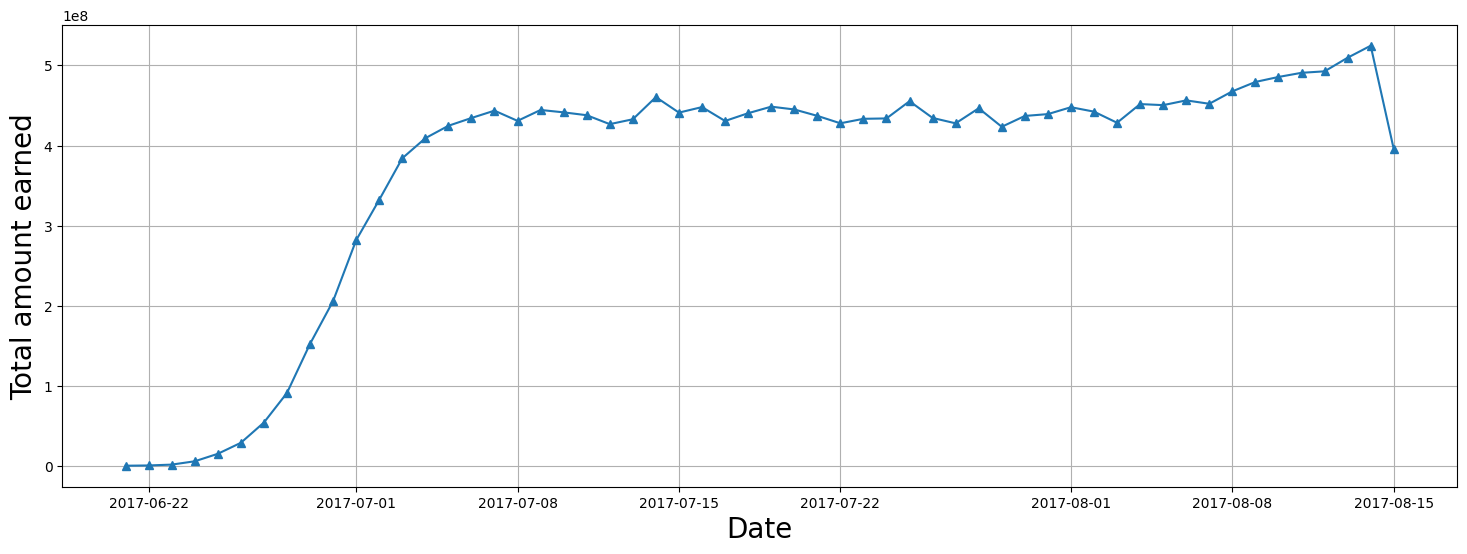

In [ ]:
bookings = pd.read_sql_query("""select * from bookings""", connect)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
x = bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize = (18, 6))
plt.plot(x.index, x['total_amount'], marker = '^')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Total amount earned', fontsize = 20)
plt.grid('b')
plt.show()

In [ ]:
merged_data = pd.merge(ticket_flight,flight, on='flight_id')
merged_data

,ticket_no,flight_id,fare_conditions,amount,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,0005432159776,30625,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
1,0005435212351,30625,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
2,0005435212386,30625,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
3,0005435212381,30625,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
4,0005432211370,30625,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045721,0005435097522,32094,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045722,0005435097521,32094,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045723,0005435104384,32094,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045724,0005435104352,32094,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N


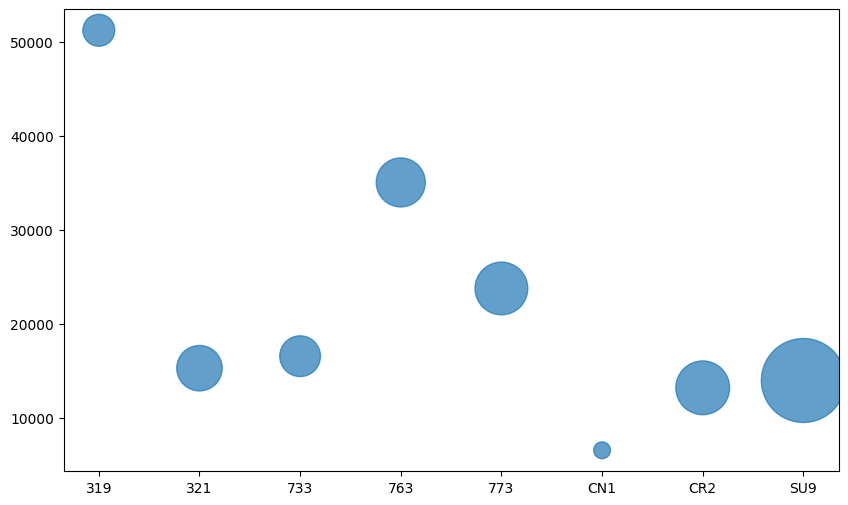

In [ ]:
summary_data = merged_data.groupby('aircraft_code').agg({'amount': 'mean', 'ticket_no': 'count'}).reset_index()
summary_data
plt.figure(figsize=(10, 6))
plt.scatter(summary_data['aircraft_code'], summary_data['amount'],cmap='viridis',s=summary_data['ticket_no']*0.01, alpha=0.7)


### Calculate Ticket booked for each aircraft_code  with Average pricing?

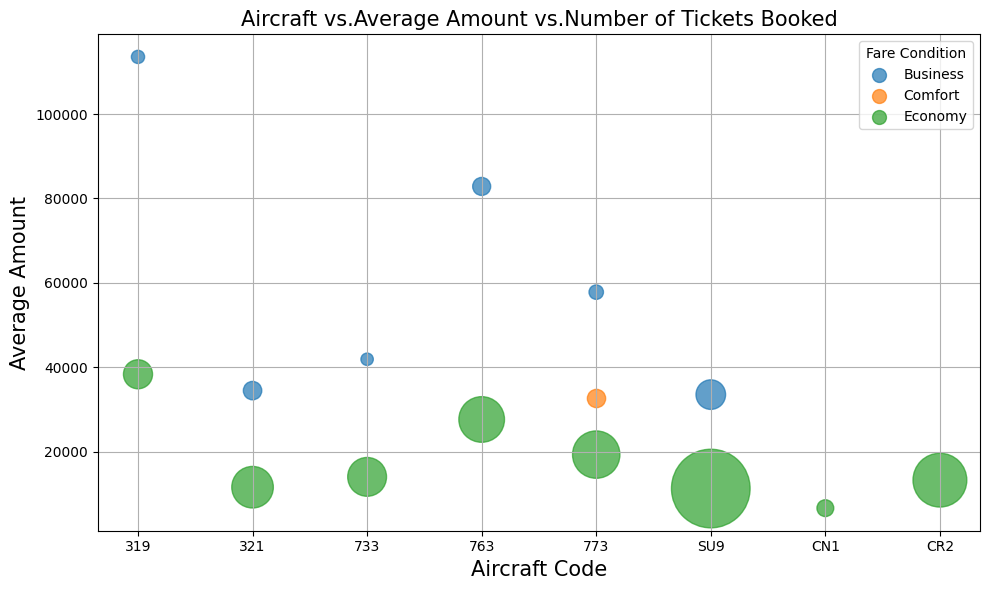

In [ ]:
summary_data = merged_data.groupby(['aircraft_code', 'fare_conditions']).agg({'amount': 'mean', 'ticket_no': 'count'}).reset_index()

plt.figure(figsize=(10, 6))
for fare_condition, data in summary_data.groupby('fare_conditions'):
    plt.scatter(data['aircraft_code'], data['amount'], s=data['ticket_no']*0.01, alpha=0.7, label=fare_condition)

plt.title('Aircraft vs.Average Amount vs.Number of Tickets Booked',fontsize=15)
plt.xlabel('Aircraft Code',fontsize = 15)
plt.ylabel('Average Amount',fontsize = 15)
plt.grid(True)

marker_size = 100
legend = plt.legend(title='Fare Condition')
for handle in legend.legendHandles:
    handle.set_sizes([marker_size ])

plt.tight_layout()
plt.show()


In [ ]:
flight_routes = flight.groupby(['departure_airport', 'arrival_airport']).size().reset_index(name='flight_count')
popular_routes = flight_routes.sort_values(by='flight_count', ascending=False)
popular_routes.head(10)



,departure_airport,arrival_airport,flight_count
464,SVO,LED,305
267,LED,SVO,305
253,LED,DME,244
88,DME,LED,244
69,DME,BZK,183
569,VKO,BZK,183
451,SVO,BZK,183
577,VKO,LED,183
270,LED,VKO,183
44,BZK,VKO,183


### Average charges for each aircraft with different fare conditions

Text(0, 0.5, 'Average Amount')

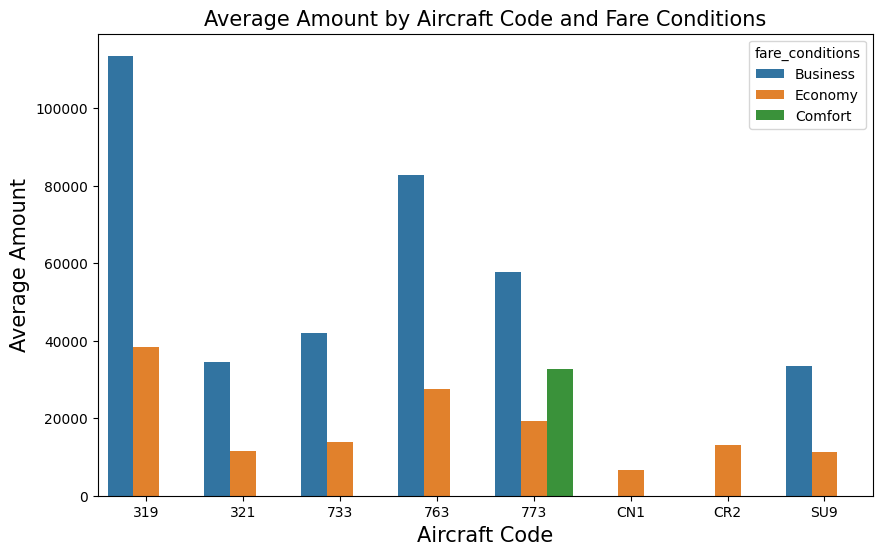

In [ ]:
df = pd.read_sql_query("""select fare_conditions, aircraft_code, avg(amount) as Average_amount from ticket_flights join
                            flights on ticket_flights.flight_id=flights.flight_id
                            group by aircraft_code, fare_conditions""", connect)

plt.figure(figsize=(10, 6))
sns.barplot(data = df, x = 'aircraft_code', y = 'Average_amount', hue = 'fare_conditions')
plt.title('Average Amount by Aircraft Code and Fare Conditions', fontsize=15)
plt.xlabel('Aircraft Code', fontsize=15)
plt.ylabel('Average Amount', fontsize=15)

#Identify high-demand aircraft types, flight routes, and peak days of the week to optimize profitabilit

Understanding the correlation between busy flight routes and aircraft service durability. Analyzing how revenue generation is influenced by busy routes and the impact of increased flight frequency on factors such as maintenance, fuel consumption, and overall service quality.

In [ ]:
flight['scheduled_departure'] = pd.to_datetime(flight['scheduled_departure'])
flight['day_of_week'] = flight['scheduled_departure'].dt.day_name()
flight

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,day_of_week
0,1185,PG0134,2017-09-10 09:50:00+03:00,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N,Sunday
1,3979,PG0052,2017-08-25 14:50:00+03:00,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N,Friday
2,4739,PG0561,2017-09-05 12:30:00+03:00,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N,Tuesday
3,5502,PG0529,2017-09-12 09:50:00+03:00,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N,Tuesday
4,6938,PG0461,2017-09-04 12:25:00+03:00,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N,Monday
...,...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03:00,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,Wednesday
33117,33118,PG0063,2017-07-28 19:25:00+03:00,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03,Friday
33118,33119,PG0063,2017-09-08 19:25:00+03:00,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N,Friday
33119,33120,PG0063,2017-08-01 19:25:00+03:00,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03,Tuesday


In [ ]:
flight_routes = flight.groupby(['departure_airport', 'arrival_airport']).size().reset_index(name='flight_count')
popular_routes = flight_routes.sort_values(by='flight_count', ascending=False)
popular_routes.head(10)


,departure_airport,arrival_airport,flight_count
464,SVO,LED,305
267,LED,SVO,305
253,LED,DME,244
88,DME,LED,244
69,DME,BZK,183
569,VKO,BZK,183
451,SVO,BZK,183
577,VKO,LED,183
270,LED,VKO,183
44,BZK,VKO,183


In [ ]:
flight_count_by_aircraft_day = flight.groupby(['aircraft_code', 'day_of_week']).size().unstack()
flight_count_by_aircraft_day

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
aircraft_code,,,,,,,
319,112,189,200,207,180,162,189
321,256,288,256,288,288,288,288
733,144,207,176,171,162,216,198
763,144,180,168,189,180,171,189
773,80,90,80,90,90,90,90
CN1,1168,1368,1256,1341,1431,1386,1323
CR2,968,1269,1240,1485,1368,1314,1404
SU9,1072,1233,1168,1251,1251,1278,1251


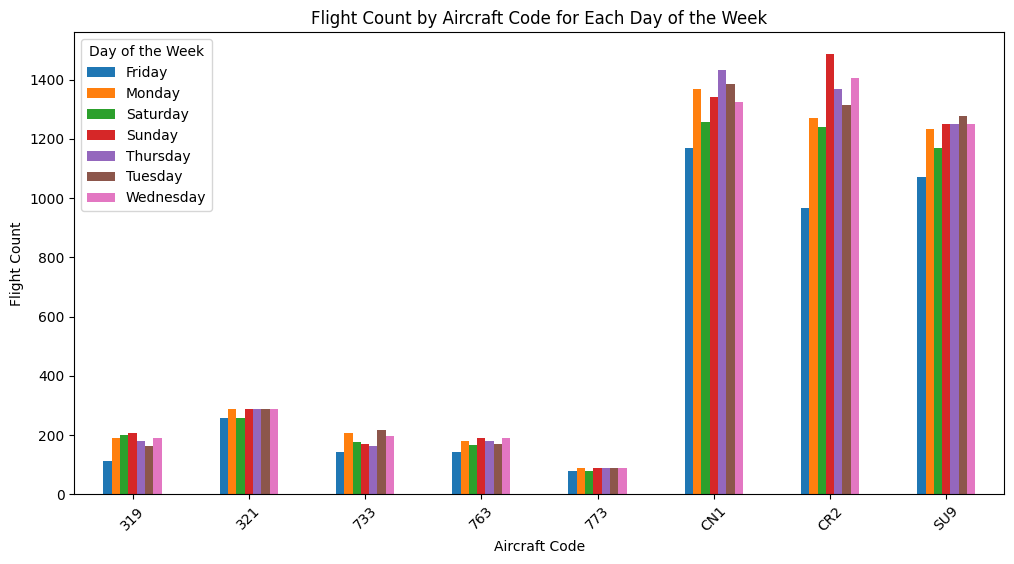

In [ ]:
flight_count_by_aircraft_day.plot(kind='bar', figsize=(12, 6))
plt.title('Flight Count by Aircraft Code for Each Day of the Week')
plt.xlabel('Aircraft Code')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')
plt.show()

## Analyzing occupancy rate

Airlines must analyse their revenue streams in order to maximize profitability. The overall income per year and average revenue per ticket are important metrics to consider. This research also assists in pricing optimization and allocating more resources to profitable routes.

### For each aircraft, calculate the total revenue per year and the average revenue per ticket

In [ ]:
pd.read_sql_query("""select aircraft_code, ticket_count, total_revenue, total_revenue/ticket_count as avg_per_ticket from
                (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights
                join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code)""", connect)

,aircraft_code,ticket_count,total_revenue,avg_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


From the above table it is evident that, the aircraft with highest total revenue is **SU9** and from the barplot in the previous section we can deduce that the price of business class and economy is the lowest in this aircraft. This can be a contributing factor for increase in revenue as more number of people might opt for this aircraft ticket owing to it's comparitively lesser cost.

The aircraft with the least total revenue is **CN1**, and the possible reason for this may be that it offers only economy class with the cheapest price per ticket and this may be due to poor conditions or less facilities and people may associate it with poor service and lower quality.

### Calculate the average occupancy per aircraft

The average occupancy per aircraft is another critical number to consider. Airlines may measure how successfully they fill their seats and discover chances to boost occupancy rates with this metric. Higher occupancy rates can help airlines increase revenue and profit while decreasing operational expenses associated with empty seats.

In [ ]:

occupied_seats = pd.read_sql_query("""
SELECT aircraft_code, flights.flight_id, COUNT(*) AS seats_count
FROM boarding_passes
INNER JOIN flights ON boarding_passes.flight_id = flights.flight_id
GROUP BY aircraft_code, flights.flight_id;
""", connect)

occupied_seats

,aircraft_code,flight_id,seats_count
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [ ]:
Total_seats= pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats group by aircraft_code;""",connect)
Total_seats

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


## Calculate Occupancy Rate by using SQL_query

In [ ]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code, round(avg(a.seats_count),0) as booked_seats,
                                    b.num_seats,
                                    round((avg(a.seats_count)/b.num_seats)* 100) as occupancy_rate
                                    from (select aircraft_code, flights.flight_id, count(*) as seats_count
                                     from boarding_passes
                                     inner join flights
                                     on boarding_passes.flight_id=flights.flight_id
                                     group by aircraft_code, flights.flight_id) AS a
                                     inner join
                                     (select aircraft_code, count(*) as num_seats from seats group by aircraft_code) AS b
                                    on a.aircraft_code = b.aircraft_code
                                    group by a.aircraft_code""", connect)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,54.0,116,46.0
1,321,89.0,170,52.0
2,733,80.0,130,62.0
3,763,114.0,222,51.0
4,773,265.0,402,66.0
5,CN1,6.0,12,50.0
6,CR2,21.0,50,43.0
7,SU9,57.0,97,59.0


### Occupancy Rate by using pandas Library  

In [ ]:
a = boarding_pass.merge(flight, on='flight_id')
a = a.groupby(['aircraft_code', 'flight_id']).size().reset_index(name='seats_count')
b = seats.groupby('aircraft_code').size().reset_index(name='num_seats')
merged_data = pd.merge(a, b, on='aircraft_code')

result = merged_data.groupby('aircraft_code').agg({'seats_count': 'mean', 'num_seats': 'first'}).reset_index()
result['occupancy_rate'] = round(result['seats_count'] / result['num_seats']*100)
result.rename(columns={'seats_count': 'booked_seats'}, inplace=True)
result

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,46.0
1,321,88.809231,170,52.0
2,733,80.255462,130,62.0
3,763,113.937294,222,51.0
4,773,264.925806,402,66.0
5,CN1,6.004431,12,50.0
6,CR2,21.482847,50,43.0
7,SU9,56.812113,97,59.0


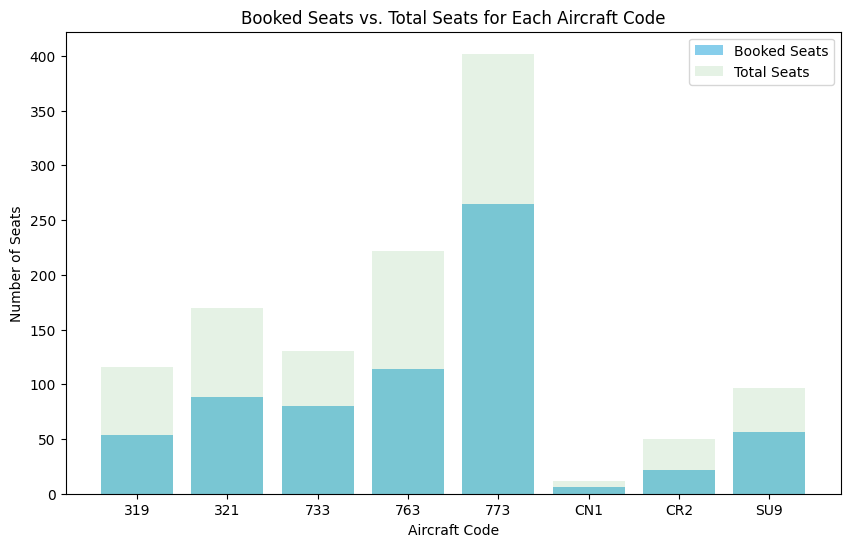

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar('aircraft_code', 'booked_seats', data=result,color='skyblue', label='Booked Seats')
plt.bar('aircraft_code', 'num_seats', data= result,color='green', alpha=0.1, label='Total Seats')

# Add labels and title
plt.xlabel('Aircraft Code')
plt.ylabel('Number of Seats')
plt.title('Booked Seats vs. Total Seats for Each Aircraft Code')
plt.legend()


In [ ]:
occupancy_rate['Inc_occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc_occupancy rate
0,319,54.0,116,46.0,50.6
1,321,89.0,170,52.0,57.2
2,733,80.0,130,62.0,68.2
3,763,114.0,222,51.0,56.1
4,773,265.0,402,66.0,72.6
5,CN1,6.0,12,50.0,55.0
6,CR2,21.0,50,43.0,47.3
7,SU9,57.0,97,59.0,64.9


In [ ]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights
                                    join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code""", connect)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


##Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate

In [ ]:
occupancy_rate['Annual_Turnover'] = pd.read_sql_query("""select sum(amount) as Annual_revenue from ticket_flights
                                    join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code""", connect)

In [ ]:
occupancy_rate['Inc_Annual_Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Inc_occupancy rate']
df= pd.DataFrame(occupancy_rate)
df

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc_occupancy rate,Annual_Turnover,Inc_Annual_Turnover
0,319,54.0,116,46.0,50.6,2706163100,2.976779e+09
1,321,89.0,170,52.0,57.2,1638164100,1.801981e+09
2,733,80.0,130,62.0,68.2,1426552100,1.569207e+09
3,763,114.0,222,51.0,56.1,4371277100,4.808405e+09
4,773,265.0,402,66.0,72.6,3431205500,3.774326e+09
5,CN1,6.0,12,50.0,55.0,96373800,1.060112e+08
6,CR2,21.0,50,43.0,47.3,1982760500,2.181037e+09
7,SU9,57.0,97,59.0,64.9,5114484700,5.625933e+09


In [ ]:
import plotly.graph_objects as go
import pandas as pd


# Create the bar graph
fig = go.Figure()

# Add bars for Annual Turnover and Inc Annual Turnover
fig.add_trace(go.Bar(x=df['aircraft_code'], y=df['Annual_Turnover'], name='Annual Turnover', text=df['occupancy_rate'], hoverinfo='text'))
fig.add_trace(go.Bar(x=df['aircraft_code'], y=df['Inc_Annual_Turnover'], name='Inc_Annual Turnover', text=df['Inc_occupancy rate'], hoverinfo='text'))

# Update layout
fig.update_layout(
    title="Annual Turnover vs Inc Annual Turnover by Aircraft",
    xaxis_title="Aircraft Code",
    yaxis_title="Turnover",
    barmode='group'
)

# Show the plot
fig.show()


#Conclusion
To summarize, analyzing revenue data such as total revenue per year, average revenue per ticket, and average occupancy rate per aircraft is critical for airlines to maximize profitability. Airlines can find areas for improvement and modify their pricing to reflect the result of these indicators. A greater occupancy rate is one important feature that can enhance profitability by generating more revenue while minimizing operational costs associated with vacant seats.

The airline should revise the price for each aircraft as keeping the price too low or two high drives customer ticket purchasing behavior. They should decide a reasonable price as per the facilities offered and the condition of the aircraft.